In [2]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
import pandas as pd
from Bio import SeqIO, AlignIO, Phylo
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align.Applications import ClustalOmegaCommandline
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
import matplotlib.pyplot as plt

In [10]:
df_data = pd.read_csv("../process_results/1_processed_dataset.csv")
df_data = df_data[["genero", "id", "sequence"]]
df_data

,genero,id,sequence
0,Aspergillus,A0A336U966,MGFYRNLVLVAASCTQALGLCPAPRCDSPDIRHEWGELSREDRLSY...
1,Aspergillus,B0Y4X4,MSDLQGRKVFKVFNQDFIVDERYNVTKELGQGAYGIVCAATNVHTG...
2,Aspergillus,E9RBR0,MWYQSASLLGVAAVAQAATVHYSLDLTWETGSPNGVSREMIFVNGQ...
3,Cryptococcus,J9VHN6,MFALKSILVTSLITSTALAHFTLDYPQSRGFVDDTENQFCGGFNTV...
4,Cryptococcus,J9VND2,MIPSTAAALLTLTAGAAFAHTGCGGHEIGRRNVGGPMLYRRAVTDE...
...,...,...,...
57,Metarhizium,A0A0B4H2J9,MSQSLTSSVETDSKTGSSKAISFQDYLDLSALDWARLRAILAPTLY...
58,Aspergillus,A0A2I1C3Z1,MTKTVPPKTPAYEDTVGCQIALFEWAESYDTKDWGRLAKCIAPTLR...
59,Cryptosporiopsis,A0A4P8DJH6,MSKQPASEDIFGCQAALYEWAESYDSKDWDRLSKCIAPVLRVDYRA...
60,Metarhizium,E9ET41,MNQSLTPSAGTDSKTGSSKAISFQDYLDLSTLDWARLRAILAPALY...


In [11]:
records = []

for index in df_data.index:
    sequence = df_data["sequence"][index]
    genero = df_data["genero"][index].replace(" ", "_")
    id_sequence = df_data["id"][index]

    records.append(
        SeqRecord(seq=Seq(sequence), id=id_sequence, description=genero)
    )
SeqIO.write(records, "../process_results/fasta_doc_for_alignment.fasta", "fasta")

62

In [12]:
clustal_omega_client = ClustalOmegaCommandline(
    infile="../process_results/fasta_doc_for_alignment.fasta", 
    outfile="../process_results/result_msa.fasta",
    verbose=True,
    auto=True,
    force=True)

stdout, stderr = clustal_omega_client()

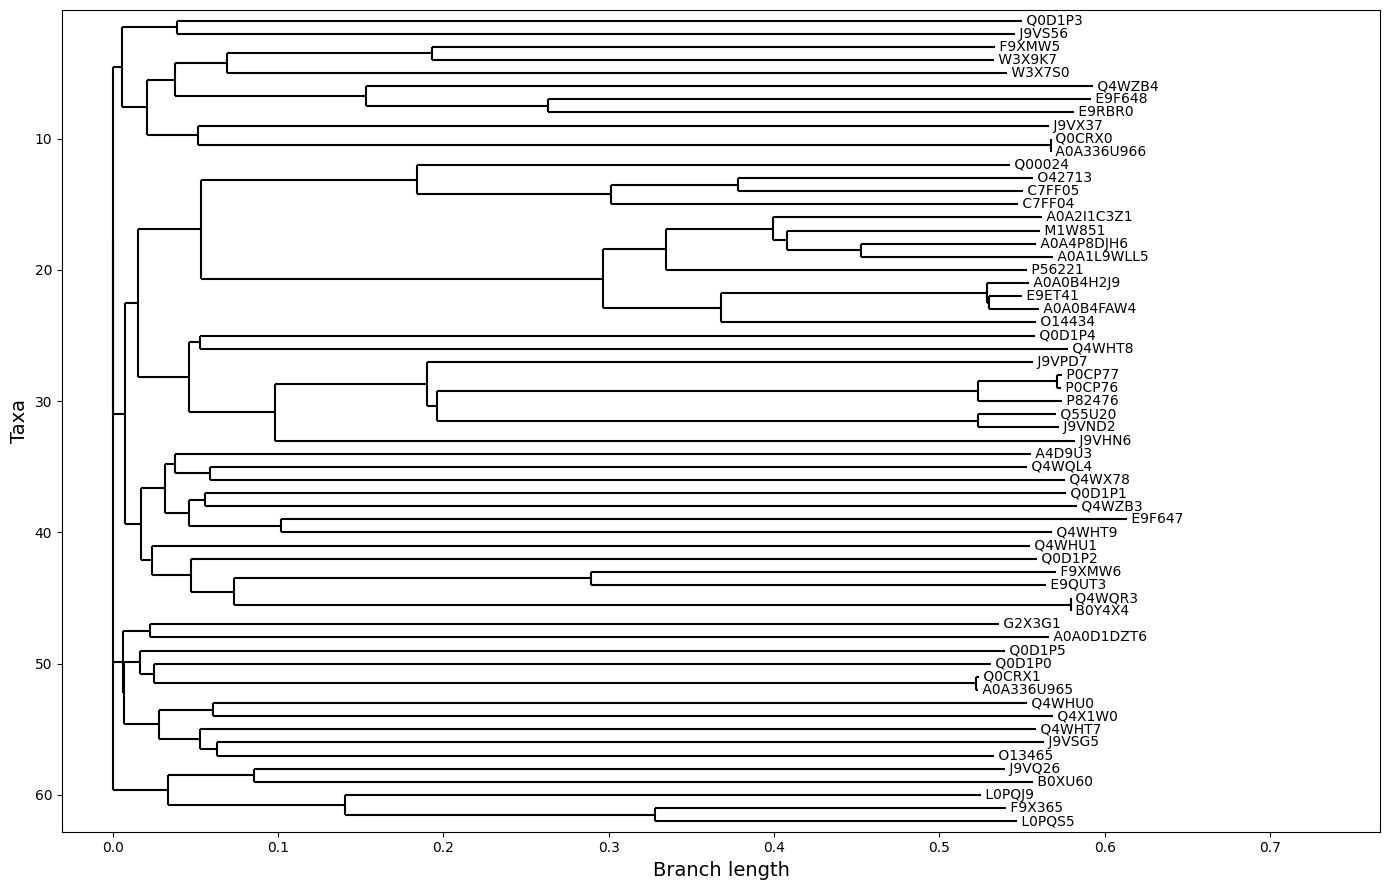

In [19]:
alignment = AlignIO.read("../process_results/result_msa.fasta", "fasta")

calculator = DistanceCalculator("blosum62")
constructor = DistanceTreeConstructor()
dm = calculator.get_distance(alignment)
tree = constructor.nj(dm)

clade_subtypes = {}
label_list = []

for clade in tree.find_clades():
    if clade.name:
        if clade.name.startswith("Inner"):
            clade.name = ""
        
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, do_show=False, axes=ax, show_confidence=False)

ax.set_xlabel("Branch length", fontsize=14)
ax.set_ylabel("Taxa", fontsize=14)

plt.tight_layout()